<font size="45">Microsoft Movie Studios Analysis</font>

<font size="5">Overview</font>

This project analyses which directors and genres Microsoft Movie Studios should consider when producing movies based on the ratings each recieved. Descriptive analysis of IMDb movie data shows that some directors have higher ratings on their movies compared to others and certain genres also have higher ratings. Microsoft movie studios can use these findings to hire outstandings directors to produce movies that everyone will enjoy.

<font size="5">Business Understanding</font>

Microsoft Movie Studios is looking to start showing orignal movies to beat out all competitors by being the most highly used streaming service. They are willing to do whatever it takes with no limitations in order to acomplish this goal. Using previous IMDb movie data that contains information on genres, directors, average ratings, and number of votes has allowed us to determine a guaranteed path to sucess for Microsoft Movie Studios and what aspects to consider.

<font size="5">Data Understandng</font>

In [34]:
# Import relevant libraries
import pandas as pd
import sqlite3 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# import zipfile

In [35]:
# Converted zipfile into a a database sqlite3 can read

# with zipfile.ZipFile("../zippedData/im.db") as zip_ref:
#     zip_ref.extractall("../zippedData/im.db")

In [36]:
# Establish the connection to the sql database
con = sqlite3.connect('../zippedData/im.db')
cursor = con.cursor()

In [37]:
# Shows each table within our database, with some basic info about each one
schema_df = pd.read_sql('''
SELECT * 
FROM sqlite_master
''', con)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [38]:
# Shows just the names of the tables in the database
schema_df['tbl_name']

0     movie_basics
1        directors
2        known_for
3       movie_akas
4    movie_ratings
5          persons
6       principals
7          writers
Name: tbl_name, dtype: object

In [39]:
# Display all columns of our database to begin exploration into the data itself
pd.read_sql('''
SELECT *
FROM movie_basics
JOIN movie_ratings
    ON movie_basics.movie_id = movie_ratings.movie_id
JOIN directors
    ON movie_basics.movie_id = directors.movie_id
JOIN persons
    ON directors.person_id = persons.person_id
''', con)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,movie_id,averagerating,numvotes,movie_id,person_id,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",tt0063540,7.0,77,tt0063540,nm0712540,nm0712540,Harnam Singh Rawail,1921.0,2004.0,"director,writer,producer"
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",tt0066787,7.2,43,tt0066787,nm0002411,nm0002411,Mani Kaul,1944.0,2011.0,"director,writer,actor"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181382,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8,tt9914642,nm5300859,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181383,tt9914642,Albatross,Albatross,2017,NaN,Documentary,tt9914642,8.5,8,tt9914642,nm5300859,nm5300859,Chris Jordan,NaN,NaN,"director,writer,editor"
181384,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5,tt9914942,nm1716653,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"
181385,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,tt9914942,6.6,5,tt9914942,nm1716653,nm1716653,Laura Jou,NaN,NaN,"miscellaneous,actress,director"


<font size="5">Data Preparation </font>

### Data Cleaning

The IMDb movie data is being cleaned to ensure the data returned is only that which is useful to us, and transforming the data into other usable forms.

In [40]:
'''
Returns a dataframe with the name of a director, the average rating of all of their movies,
and a count of how many movies they've made.
It is then filtered to only return directors who are still alive, and to only count movies meeting a threshhold of votes.
'''

filteredDirectors = pd.read_sql("""
SELECT p.primary_name AS name,
    AVG(mr.averagerating) as averageRating,
    COUNT(mb.movie_id) AS movieCount
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mr.movie_id = mb.movie_id
    JOIN directors AS d
        ON mr.movie_id = d.movie_id
    JOIN persons AS p
        ON d.person_id = p.person_id
WHERE p.death_year IS NULL
GROUP BY d.person_id
HAVING mr.numvotes > 500
ORDER BY averageRating DESC

""",con)

In [41]:
'''
Returns a dataframe contained a director and every genre they've worked in. This info is separated across multiple entries,
and will be cleaned once it is within a dataframe, so the messy data is named as such.
'''

messyDirectorGenres = pd.read_sql("""

SELECT mb.genres,
    p.primary_name AS directorName
FROM movie_basics AS mb
    JOIN directors AS d
        ON mb.movie_id = d.movie_id
    JOIN persons as p
        ON p.person_id = d.person_id

""",con)

In [42]:
# Drops null values within the dataframe, since genre was null in a few cases.
directorGenres = messyDirectorGenres.dropna()

In [43]:
'''
The genres column contained a string which had multiple genres separated by commas.
The contents of the column was then split into a list, which had several functions run on it with the purpose
of bringing that genre data into a dictionary with keys as the director name, and values containing a single list
of every genre the director worked in.
'''

directorGenres['genres'] = directorGenres['genres'].str.split(',')
directorGenreDict = directorGenres.explode('genres').groupby("directorName")['genres'].agg(['unique']).to_dict()

<ipython-input-43-443682e6515c>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  directorGenres['genres'] = directorGenres['genres'].str.split(',')


In [44]:
# The dictionary is then turned back into a dataframe to consolidate the data to have 1 entry per director.
uniqueDirectorGenres = pd.DataFrame.from_dict(data=directorGenreDict)

In [45]:
# Merges the unique genres per director to the larger df with the other data on each director
directordf = filteredDirectors.merge(uniqueDirectorGenres,how='inner',left_on='name',right_on=uniqueDirectorGenres.index)
directordf

,name,averageRating,movieCount,unique
0,Arsel Arumugam,9.70,1,[Drama]
1,Karzan Kardozi,9.60,1,"[Adventure, Biography, Documentary]"
2,Abhinav Thakur,9.60,1,"[Crime, Comedy]"
3,Sudheer Shanbhogue,9.60,1,"[Comedy, Drama, Family]"
4,Lauren Ross,9.50,3,[Documentary]
...,...,...,...,...
8370,Lukasz Karwowski,1.40,3,[Comedy]
8371,Gökhan Gök,1.30,3,[Comedy]
8372,Keiko Tsuruoka,1.25,8,"[Drama, Comedy, Family, Sci-Fi]"
8373,Naoyoshi Kawamatsu,1.10,2,"[Horror, Action, Drama]"


In [46]:
# Renames the column returned from the unique genre data
directordf['genres'] = directordf['unique']
directordf = directordf.drop(labels='unique',axis=1)
directordf

,name,averageRating,movieCount,genres
0,Arsel Arumugam,9.70,1,[Drama]
1,Karzan Kardozi,9.60,1,"[Adventure, Biography, Documentary]"
2,Abhinav Thakur,9.60,1,"[Crime, Comedy]"
3,Sudheer Shanbhogue,9.60,1,"[Comedy, Drama, Family]"
4,Lauren Ross,9.50,3,[Documentary]
...,...,...,...,...
8370,Lukasz Karwowski,1.40,3,[Comedy]
8371,Gökhan Gök,1.30,3,[Comedy]
8372,Keiko Tsuruoka,1.25,8,"[Drama, Comedy, Family, Sci-Fi]"
8373,Naoyoshi Kawamatsu,1.10,2,"[Horror, Action, Drama]"


In [47]:
# Displays only directors who have made more than 4 movies
directordf[directordf['movieCount'] > 4]

,name,averageRating,movieCount,genres
48,Thiagarajan Kumararaja,8.760000,5,"[Action, Crime, Thriller, Drama]"
55,Quentin Tarantino,8.700000,5,"[Drama, Western, Crime, Mystery, Action, Thril..."
81,Rishab Shetty,8.500000,10,"[Romance, Thriller, Comedy, Drama, Family]"
93,Christopher Nolan,8.437500,8,"[Adventure, Drama, Sci-Fi, Action, Thriller, H..."
114,Harry Baweja,8.360000,5,"[Animation, History]"
...,...,...,...,...
8324,Lawrence Kasanoff,2.516667,6,"[Action, Animation, Comedy, Documentary]"
8341,Ryan Travis,2.300000,6,"[Action, Comedy, Sci-Fi]"
8355,Andrew Bellware,2.087500,8,"[Action, Sci-Fi, Thriller]"
8359,Ezio Greggio,1.900000,5,"[Comedy, Family]"


In [48]:
'''
Returns data including genres and ratings for every movie in the data, still filtering to only movies with more than 500 votes.
'''

uniqueGenreData = pd.read_sql("""

SELECT mr.averagerating AS rating,
    mb.genres,
    mb.primary_title AS title
FROM movie_basics AS mb
    JOIN movie_ratings AS mr
        ON mb.movie_id = mr.movie_id
WHERE numvotes > 500

""",con)

uniqueGenreData['genres'] = uniqueGenreData['genres'].str.split(',')

In [64]:
'''
Returns a dataframe listing the average rating of each individual genre.
This does count many movies repeatedly, since each movie can have more than one genre,
but the average rating per genre should include all movies in a genre, even if the movie is also in other genres.
'''

singleGenreRatings = uniqueGenreData.explode('genres').groupby('genres').agg(['mean'])
singleGenreRatings

,rating
,mean
genres,
Action,5.852269
Adventure,6.032336
Animation,6.559959
Biography,6.937696
Comedy,5.980927
Crime,6.177470
Documentary,7.196806
Drama,6.394912


In [65]:
# Renames the column the averages were stored in, making it easy to access.
singleGenreRatings['averageRating'] = singleGenreRatings[('rating','mean')]
singleGenreRatings = singleGenreRatings.drop(labels=('rating','mean'),axis=1)

In [67]:
# Sorts the genres by rating from highest to lowest, giving us usable data about genre
singleGenreRatings = singleGenreRatings.sort_values('averageRating',ascending=False)
singleGenreRatings

,averageRating
,
genres,
News,7.530556
Documentary,7.196806
Biography,6.937696
History,6.787313
Sport,6.786643
Music,6.722306
Animation,6.559959
Musical,6.463889


### Data Exploration

In [84]:
# Looking at all directors
directordf

,name,averageRating,movieCount,genres
0,Arsel Arumugam,9.70,1,[Drama]
1,Karzan Kardozi,9.60,1,"[Adventure, Biography, Documentary]"
2,Abhinav Thakur,9.60,1,"[Crime, Comedy]"
3,Sudheer Shanbhogue,9.60,1,"[Comedy, Drama, Family]"
4,Lauren Ross,9.50,3,[Documentary]
...,...,...,...,...
8370,Lukasz Karwowski,1.40,3,[Comedy]
8371,Gökhan Gök,1.30,3,[Comedy]
8372,Keiko Tsuruoka,1.25,8,"[Drama, Comedy, Family, Sci-Fi]"
8373,Naoyoshi Kawamatsu,1.10,2,"[Horror, Action, Drama]"


In [87]:
# Looking only at directors who have made at least 5 movies to avoid 1 hit wonders scewing the results
directordf[directordf['movieCount'] >= 5]

,name,averageRating,movieCount,genres
48,Thiagarajan Kumararaja,8.760000,5,"[Action, Crime, Thriller, Drama]"
55,Quentin Tarantino,8.700000,5,"[Drama, Western, Crime, Mystery, Action, Thril..."
81,Rishab Shetty,8.500000,10,"[Romance, Thriller, Comedy, Drama, Family]"
93,Christopher Nolan,8.437500,8,"[Adventure, Drama, Sci-Fi, Action, Thriller, H..."
114,Harry Baweja,8.360000,5,"[Animation, History]"
...,...,...,...,...
8324,Lawrence Kasanoff,2.516667,6,"[Action, Animation, Comedy, Documentary]"
8341,Ryan Travis,2.300000,6,"[Action, Comedy, Sci-Fi]"
8355,Andrew Bellware,2.087500,8,"[Action, Sci-Fi, Thriller]"
8359,Ezio Greggio,1.900000,5,"[Comedy, Family]"


In [94]:
'''
Looking only at very highly ranked directors who have made multiple projects,
and then seeing that it yields 37 results.
'''

display(directordf[(directordf['averageRating'] >= 8) & (directordf['movieCount'] >= 5)])
display(len(directordf[(directordf['averageRating'] >= 8) & (directordf['movieCount'] >= 5)]))

,name,averageRating,movieCount,genres
48,Thiagarajan Kumararaja,8.760000,5,"[Action, Crime, Thriller, Drama]"
55,Quentin Tarantino,8.700000,5,"[Drama, Western, Crime, Mystery, Action, Thril..."
81,Rishab Shetty,8.500000,10,"[Romance, Thriller, Comedy, Drama, Family]"
93,Christopher Nolan,8.437500,8,"[Adventure, Drama, Sci-Fi, Action, Thriller, H..."
114,Harry Baweja,8.360000,5,"[Animation, History]"
116,Lee Unkrich,8.350000,8,"[Adventure, Animation, Comedy, Action]"
117,Vetrimaaran,8.340000,5,"[Action, Drama, Sport, Crime, Thriller]"
119,Rahi Anil Barve,8.300000,5,"[Drama, Fantasy, Horror]"
129,Adesh Prasad,8.300000,5,"[Drama, Fantasy, Horror]"
136,David Zieff,8.300000,5,"[Adventure, Biography, Documentary]"


37

In [95]:
'''
Same information as above, but being less selective about directorRating and allowing 7 or above rather than 8 or above.
This less selective dataset yields 428 directors.
'''

display(directordf[(directordf['averageRating'] >= 7) & (directordf['movieCount'] >= 5)])
display(len(directordf[(directordf['averageRating'] >= 7) & (directordf['movieCount'] >= 5)]))

,name,averageRating,movieCount,genres
48,Thiagarajan Kumararaja,8.7600,5,"[Action, Crime, Thriller, Drama]"
55,Quentin Tarantino,8.7000,5,"[Drama, Western, Crime, Mystery, Action, Thril..."
81,Rishab Shetty,8.5000,10,"[Romance, Thriller, Comedy, Drama, Family]"
93,Christopher Nolan,8.4375,8,"[Adventure, Drama, Sci-Fi, Action, Thriller, H..."
114,Harry Baweja,8.3600,5,"[Animation, History]"
...,...,...,...,...
1866,Robert Stromberg,7.0000,9,"[Action, Adventure, Family]"
1870,Robert Sarkies,7.0000,5,"[Comedy, Drama]"
1872,Rufus Norris,7.0000,6,"[Drama, Romance, Musical, Mystery, Thriller]"
1873,Wolfgang Murnberger,7.0000,5,"[Comedy, Drama, War, Crime, Thriller]"


428

<font size="5">Data Visualization</font>

This barplot is showing the top 10 directors with the highest movie ratings.

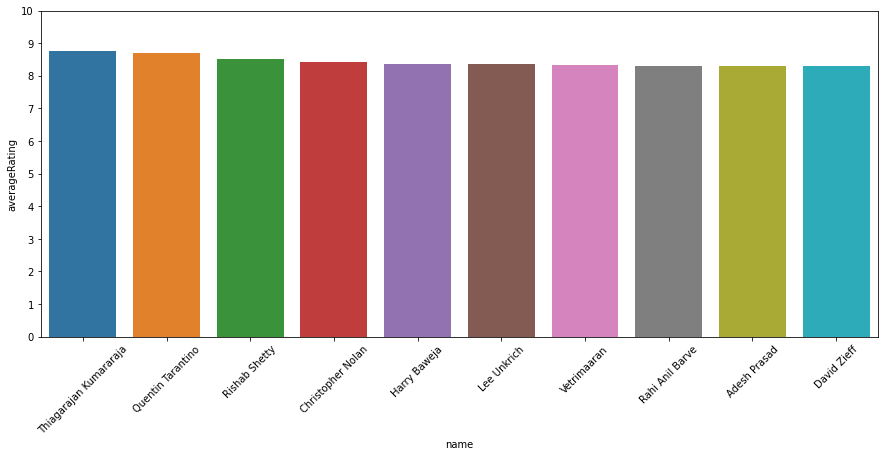

In [70]:
'''
Makes a bar plot with the top 10 highest rated directors, showing little variation within the top 10.
'''

fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=directordf[directordf['movieCount'] > 4][:10],x='name',y='averageRating')
plt.xticks(rotation=45);
plt.yticks(range(11));

This barplot is showing the 10 directors with the lowest movie ratings.

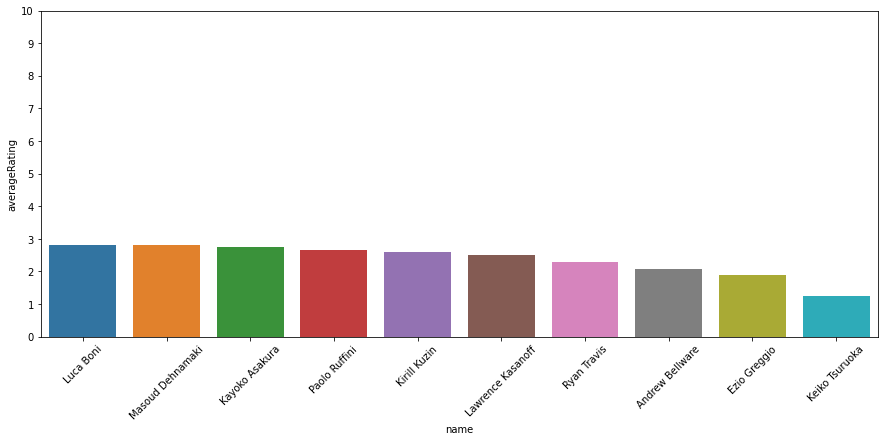

In [71]:
'''
Makes a bar plot with the top 10 lowest rated directors, showing people who should not be hired.
'''


fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=directordf[directordf['movieCount'] > 4][-10:],x='name',y='averageRating')
plt.xticks(rotation=45);
plt.yticks(range(11));

This barplot is showing the top 10 genres ratings.

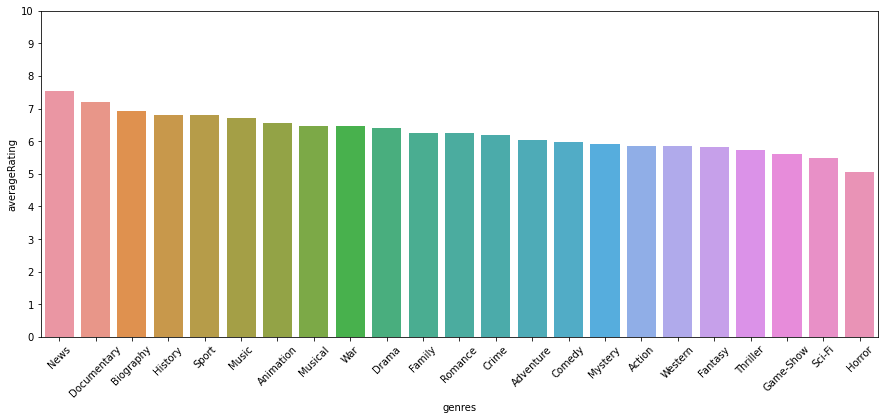

In [74]:
'''
Makes a barplot showing all genres, showing a few that stand out, with little variation in the middle of the chart.
'''

fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=singleGenreRatings,x=singleGenreRatings.index,y='averageRating')

plt.xticks(rotation=45);
plt.yticks(range(11));

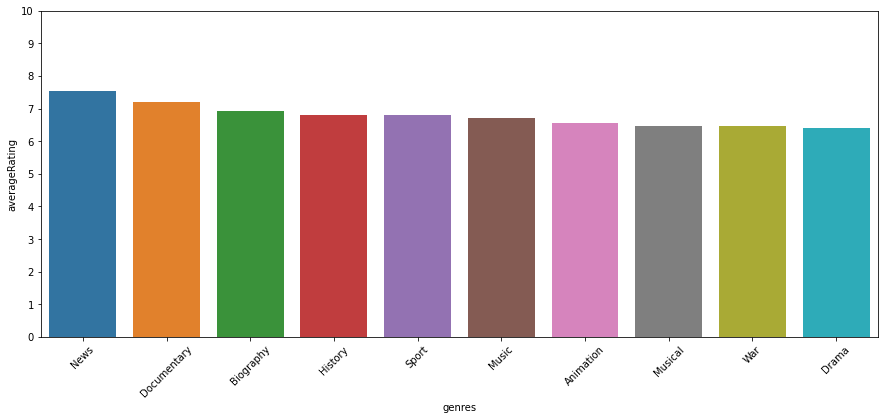

In [77]:
'''
Makes a barplot showing just the 10 highest rated genres. 
The top few are only slightly higher than the ones below, leaving no clear gap of where genre ratings drop off.
'''

fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=singleGenreRatings[:10],x=singleGenreRatings.index[:10],y='averageRating')

plt.xticks(rotation=45);
plt.yticks(range(11));

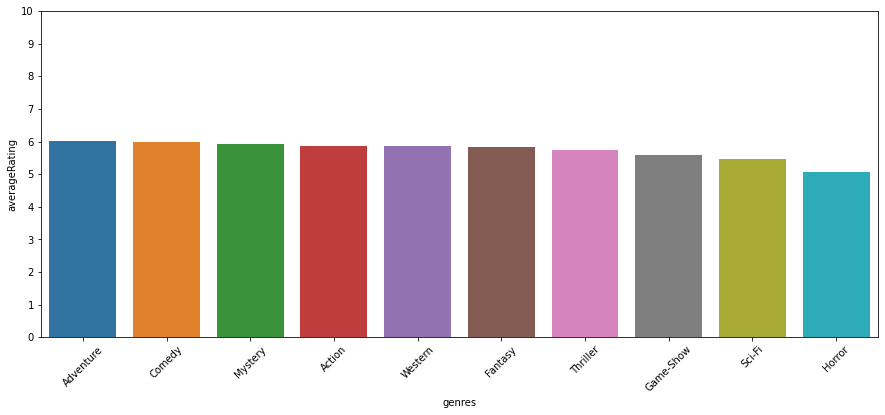

In [80]:
'''
Makes a barplot showing just the 10 lowest rated genres. 
There is little variation here, with the only major decline being the horror genre.
'''

fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=singleGenreRatings[-10:],x=singleGenreRatings.index[-10:],y='averageRating')

plt.xticks(rotation=45);
plt.yticks(range(11));

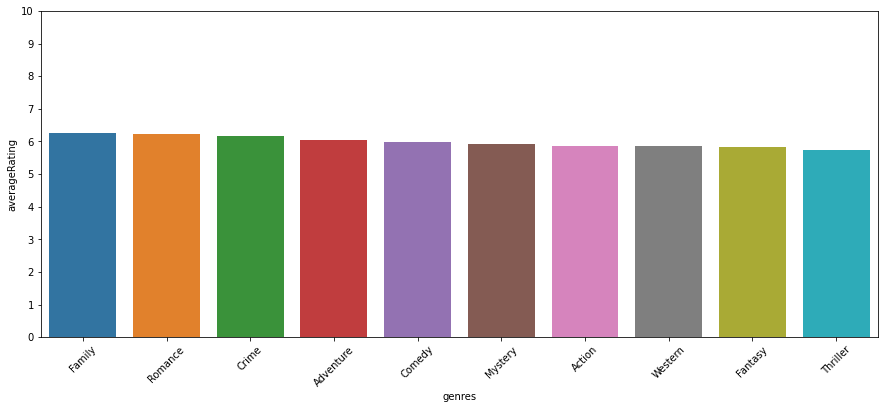

In [79]:
'''
Makes a barplot showing 10 genres in the middle of the rankings. 
There is very little variation here, even less than the top or bottom.
'''

fig,ax = plt.subplots(figsize=(15,6))

sns.barplot(data=singleGenreRatings[10:20],x=singleGenreRatings.index[10:20],y='averageRating')

plt.xticks(rotation=45);
plt.yticks(range(11));

<font size="5">Conclusion</font>

This Data analysis leads to three recommendations that will allow Microsoft Movie Studios to come out as being the most popular streaming service in business.
- Look to hire directors who have made at least 5 productions that have high ratings. Directors who are dominating in the film industry are more likely to provide you with a well loved movie.
- Focus on hiring directors that have a high ranking (an average ranking of 8.0 or higher leaves 37 options, 7.0 or higher leaves 428 options)
- Let the directors work in genres they've done well in in the past.

<font size="5">Next Step</font>

Our next steps would be to analyze additional metrics such as adding writers and actors rather than simply looking at directors, and to look at genres that commonly coincide rather than separating it into only unique genres.
- Look at addition metrics for movie actors. Having well known experienced actors would be a benefit that would lure people to these movies.
- Look at addition metrics for movie writers. Yes, directors are important since they have control but writers are the people who create the piece from scratch. Involving writers would also be beneficial.
- Look at coinciding genres. This project focused on individual genres so considering that many movies are associaed with more than one genres, looking at grouped genres would give another view.